# Prediction and forecasting results in the English Premier League

## Self tests

In [1]:
# This code widens the working frame to fill the full screenwidth, which is often useful.

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
# Here we import the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
wagedat=pd.read_excel("../../Data/Week 3/EPL club wages and position 1997-2018.xlsx")
TMdat = pd.read_excel("../../Data/Week 3/EPL TM values 2010-11 to 2019-20.xlsx")

In [4]:
wagedat['teamid'] = wagedat['Club']+wagedat['seasonyrend'].map(str)


In [5]:
# create the same team/year id in TMdat

TMdat['teamid'] = TMdat['Club']+TMdat['seasonyrend'].map(str)


## Self Test - 1

Create the merged file but include the 'Position' variable from the wagedat df as well.

In [6]:
#Self Test
TMdat = pd.merge(TMdat[['teamid','TMValue','seasonyrend']],wagedat[['teamid','wages', 'Position']], on= 'teamid', how = 'left')
TMdat

,teamid,TMValue,seasonyrend,wages,Position
0,Arsenal2011,272.70,2011,124401000.0,4.0
1,Aston Villa2011,127.94,2011,83395000.0,9.0
2,Birmingham City2011,68.00,2011,45088340.0,18.0
3,Blackburn Rovers2011,65.93,2011,49869577.0,15.0
4,Blackpool2011,24.37,2011,26014248.0,19.0
...,...,...,...,...,...
195,Southampton2020,209.70,2020,NaN,NaN
196,Tottenham Hotspur2020,881.55,2020,NaN,NaN
197,Watford2020,214.52,2020,NaN,NaN
198,West Ham United2020,299.03,2020,NaN,NaN


In [7]:
# The TM data is expressed in £ million, while the wage data is in £. We can convert to common units by dividing wages by 1 million, 
# although this is not strictly necessary for the purpose of measuring correlation.

TMdat['wages']=TMdat['wages']/1000000
TMdat

,teamid,TMValue,seasonyrend,wages,Position
0,Arsenal2011,272.70,2011,124.401000,4.0
1,Aston Villa2011,127.94,2011,83.395000,9.0
2,Birmingham City2011,68.00,2011,45.088340,18.0
3,Blackburn Rovers2011,65.93,2011,49.869577,15.0
4,Blackpool2011,24.37,2011,26.014248,19.0
...,...,...,...,...,...
195,Southampton2020,209.70,2020,NaN,NaN
196,Tottenham Hotspur2020,881.55,2020,NaN,NaN
197,Watford2020,214.52,2020,NaN,NaN
198,West Ham United2020,299.03,2020,NaN,NaN


irst let's look at the correlation using a scatter diagram for all of the data. Using relplot in Seaborn (sns) we can see that the correlation is very close. using "hue" helps us to see how the data varies by year, but in fact the pattern is pretty consistent across all years

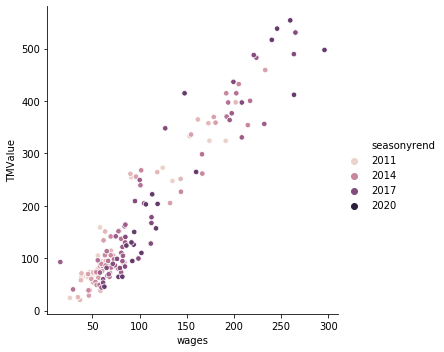

In [8]:
sns.relplot(x="wages", y="TMValue", data = TMdat, s=30, hue = "seasonyrend")

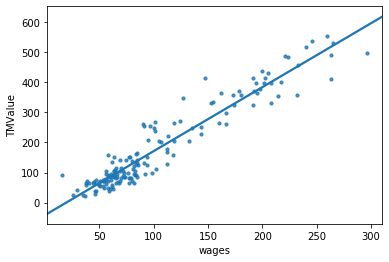

In [9]:
# If we use 'regplot' instead of 'relplot', we can add a regression line to the chart.

sns.regplot(x="wages", y="TMValue", data = TMdat, scatter_kws={'s':10}, ci = False)

## Self test - 2

Generate a relplot or regplot for (a) wages and Position and (b) TMValue and Position

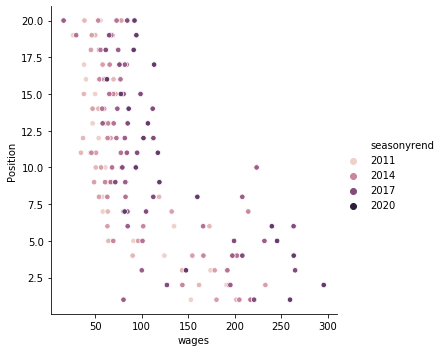

In [10]:
#Self Test a)
sns.relplot(x="wages", y="Position", data = TMdat, s=30, hue = "seasonyrend")

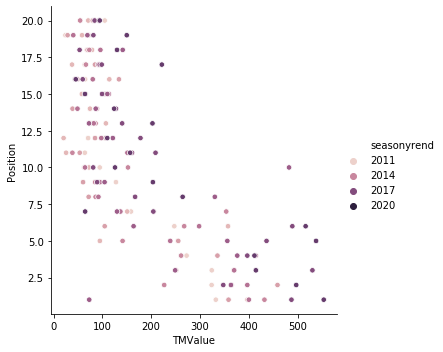

In [11]:
#Self Test b)
sns.relplot(x="TMValue", y="Position", data = TMdat, s=30, hue = "seasonyrend")

In [12]:
TMwage_lm = smf.ols(formula = 'TMValue ~ wages', data=TMdat).fit()
TMwage_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TMValue   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1575.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           4.46e-84
Time:                        13:03:27   Log-Likelihood:                -823.24
No. Observations:                 160   AIC:                             1650.
Df Residuals:                     158   BIC:                             1657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.3114      6.418     -6.436      0.000     -53.988     -28.634
wages          2.1262      0.054     39.687      0.000       2.020       2.232
==============================================================================
Omnibus:                       11.482   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.844
Skew:                           0.531   Prob(JB):                      0.00163
Kurtosis:                       3.893   Cond. No.                         233.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}
TMwage_Out = summary_col(TMwage_lm,info_dict = info_dict)
print(TMwage_Out)


                 TMValue 
-------------------------
Intercept        -41.3114
                 (6.4184)
wages            2.1262  
                 (0.0536)
R-squared        0.91    
No. observations 160     
Standard errors in
parentheses.


In [14]:
TM2011 = TMdat[TMdat.seasonyrend == 2011]
TM2012 = TMdat[TMdat.seasonyrend == 2012]
TM2013 = TMdat[TMdat.seasonyrend == 2013]
TM2014 = TMdat[TMdat.seasonyrend == 2014]
TM2015 = TMdat[TMdat.seasonyrend == 2015]
TM2016 = TMdat[TMdat.seasonyrend == 2016]
TM2017 = TMdat[TMdat.seasonyrend == 2017]
TM2018 = TMdat[TMdat.seasonyrend == 2018]

TM2011_lm = smf.ols(formula = 'TMValue ~ wages', data=TM2011).fit()
TM2012_lm = smf.ols(formula = 'TMValue ~ wages', data=TM2012).fit()
TM2013_lm = smf.ols(formula = 'TMValue ~ wages', data=TM2013).fit()
TM2014_lm = smf.ols(formula = 'TMValue ~ wages', data=TM2014).fit()
TM2015_lm = smf.ols(formula = 'TMValue ~ wages', data=TM2015).fit()
TM2016_lm = smf.ols(formula = 'TMValue ~ wages', data=TM2016).fit()
TM2017_lm = smf.ols(formula = 'TMValue ~ wages', data=TM2017).fit()
TM2018_lm = smf.ols(formula = 'TMValue ~ wages', data=TM2018).fit()


AllTM = ["All",'2011','2012','2013','2014','2015','2016','2017','2018']

TMAll_Out = summary_col([TMwage_lm,TM2011_lm, TM2012_lm,TM2013_lm, TM2014_lm,TM2015_lm,TM2016_lm, TM2017_lm,TM2018_lm],\
                        model_names = AllTM, stars=True, info_dict = info_dict)

print(TMAll_Out)


                     All        2011      2012        2013       2014        2015       2016       2017       2018   
---------------------------------------------------------------------------------------------------------------------
Intercept        -41.3114*** -16.0649  -41.9445** -51.8969*** -42.3952** -55.7933*** -24.8110  -76.4519*** -72.4432**
                 (6.4184)    (13.9340) (14.6265)  (13.5827)   (16.9183)  (14.2330)   (21.0048) (22.2210)   (29.6730) 
wages            2.1262***   2.0355*** 2.3286***  2.2880***   2.1202***  2.2213***   1.9026*** 2.3548***   2.2253*** 
                 (0.0536)    (0.1507)  (0.1541)   (0.1303)    (0.1550)   (0.1228)    (0.1683)  (0.1574)    (0.1857)  
R-squared        0.91        0.91      0.93       0.94        0.91       0.95        0.88      0.93        0.89      
No. observations 160         20        20         20          20         20          20        20          20        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<

## Self test - 3

run a regression of Position on (a) wages and (b) TMValue for all the seasons combined (i.e. not season by season) and compare the two regressions 

In [15]:
#Self Test a)
wagePos_lm = smf.ols(formula = 'Position ~ wages', data=TMdat).fit()
wagePos_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Position   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     147.5
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           2.17e-24
Time:                        13:03:27   Log-Likelihood:                -454.61
No. Observations:                 160   AIC:                             913.2
Df Residuals:                     158   BIC:                             919.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1741      0.641     26.793      0.000      15.908      18.440
wages         -0.0650      0.005    -12.144      0.000      -0.076      -0.054
==============================================================================
Omnibus:                        9.740   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                4.088
Skew:                          -0.016   Prob(JB):                        0.130
Kurtosis:                       2.218   Cond. No.                         233.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Self Test b)
TMPos_lm = smf.ols(formula = 'Position ~ TMValue', data=TMdat).fit()
TMPos_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Position   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           3.05e-29
Time:                        13:03:27   Log-Likelihood:                -443.36
No. Observations:                 160   AIC:                             890.7
Df Residuals:                     158   BIC:                             896.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0097      0.501     31.933      0.000      15.020      17.000
TMValue       -0.0311      0.002    -13.915      0.000      -0.036      -0.027
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.596
Skew:                          -0.008   Prob(JB):                        0.742
Kurtosis:                       2.701   Cond. No.                         366.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""